[Forecasting: Principles and Practice](https://otexts.com/fpp2/)

In [1]:
import pandas as pd

from graph_traffic.get_data import get_data
from graph_traffic.config import figures_path
from graph_traffic.dataloading import npzDataset
from graph_traffic.baseline_models import MeanRegressor, MedianRegressor, RepeatRegressor, RepeatLastRegressor, DaytimeRegressor, DriftRegressor
from graph_traffic.model_selection import timeseries_cv, plot_predictions, print_losses, get_node_ids
from random import choices

baseline_path = figures_path + "/baseline"

ids_to_use = get_node_ids()
print(f"total of {len(ids_to_use)} nodes")
data_dict = dict(
    ids_list=ids_to_use,#[3954, 3973, 3976, 3977, 3978],#[3532, 3542, 3544, 3545, 3546, 3577, 3637, 3640, 3641, 4761, 4763],
    seq_len=4*2,
    with_graph=False,
    from_date="2019-01-01",
    to_date="2021-12-31",
    dataset_name="small",
    target="ocupacion",
    interactions="drop"
)

meteo_dict = dict(
    rain="drop",
    wind="drop",
    temperature="drop",
    humidity="drop",
    pressure="drop",
    radiation="drop"
)

temporal_dict = dict(
    year="drop",
    season="drop",
    month="drop",
    day_of_month="drop",
    weekday="drop",
    hour="passthrough",
    minute="drop",
    bank_holiday="drop",
    school_holiday="drop",
    working_day="passthrough",
    state_of_alarm="drop"
)

get_data(data_dict, meteo_dict, temporal_dict, train_until="2021-05-31")
dataset_name = data_dict["dataset_name"]
n_points = None

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


total of 37 nodes


In [ ]:
for train_until in pd.date_range()

In [2]:
train_data = npzDataset(dataset_name, "train", n_points)
test_data = npzDataset(dataset_name, "test", n_points)

train_x = train_data.x
train_y = train_data.y

test_x = test_data.x
test_y = test_data.y

In [8]:
random_samples = choices(range(test_x.shape[0]), k=2)
random_samples

[403, 101]

In [5]:
train_x.shape, test_x.shape

((4951, 8, 37, 3), (430, 8, 37, 3))

# 1. Mean regressor

In [6]:
estimators, train_losses, test_losses = timeseries_cv(MeanRegressor(), train_x, train_y)
print_losses(train_losses, test_losses)

Train MAE: 4.24, std: 0.11
Train MSE: 57.52, std: 3.14
Test MAE: 4.68, std: 0.39
Test MSE: 76.31, std: 18.21


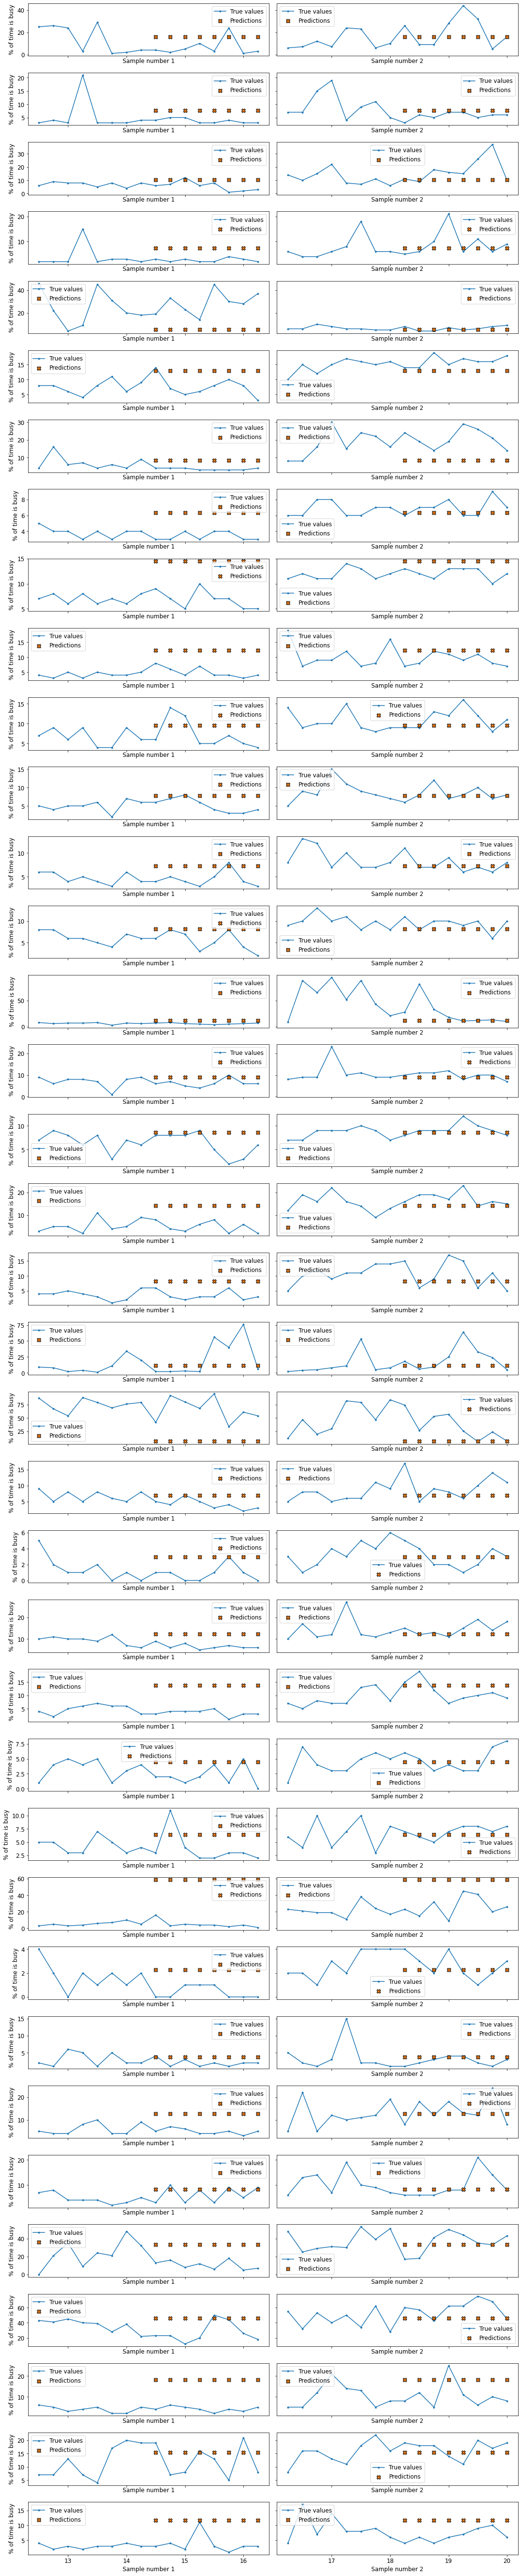

In [9]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/mean.png")

# 2. Median regressor

In [7]:
estimators, train_losses, test_losses = timeseries_cv(MedianRegressor(), train_x, train_y)
print_losses(train_losses, test_losses)

Train MAE: 6.13, std: 0.05
Train MSE: 96.88, std: 1.34
Test MAE: 6.12, std: 0.26
Test MSE: 95.41, std: 8.83


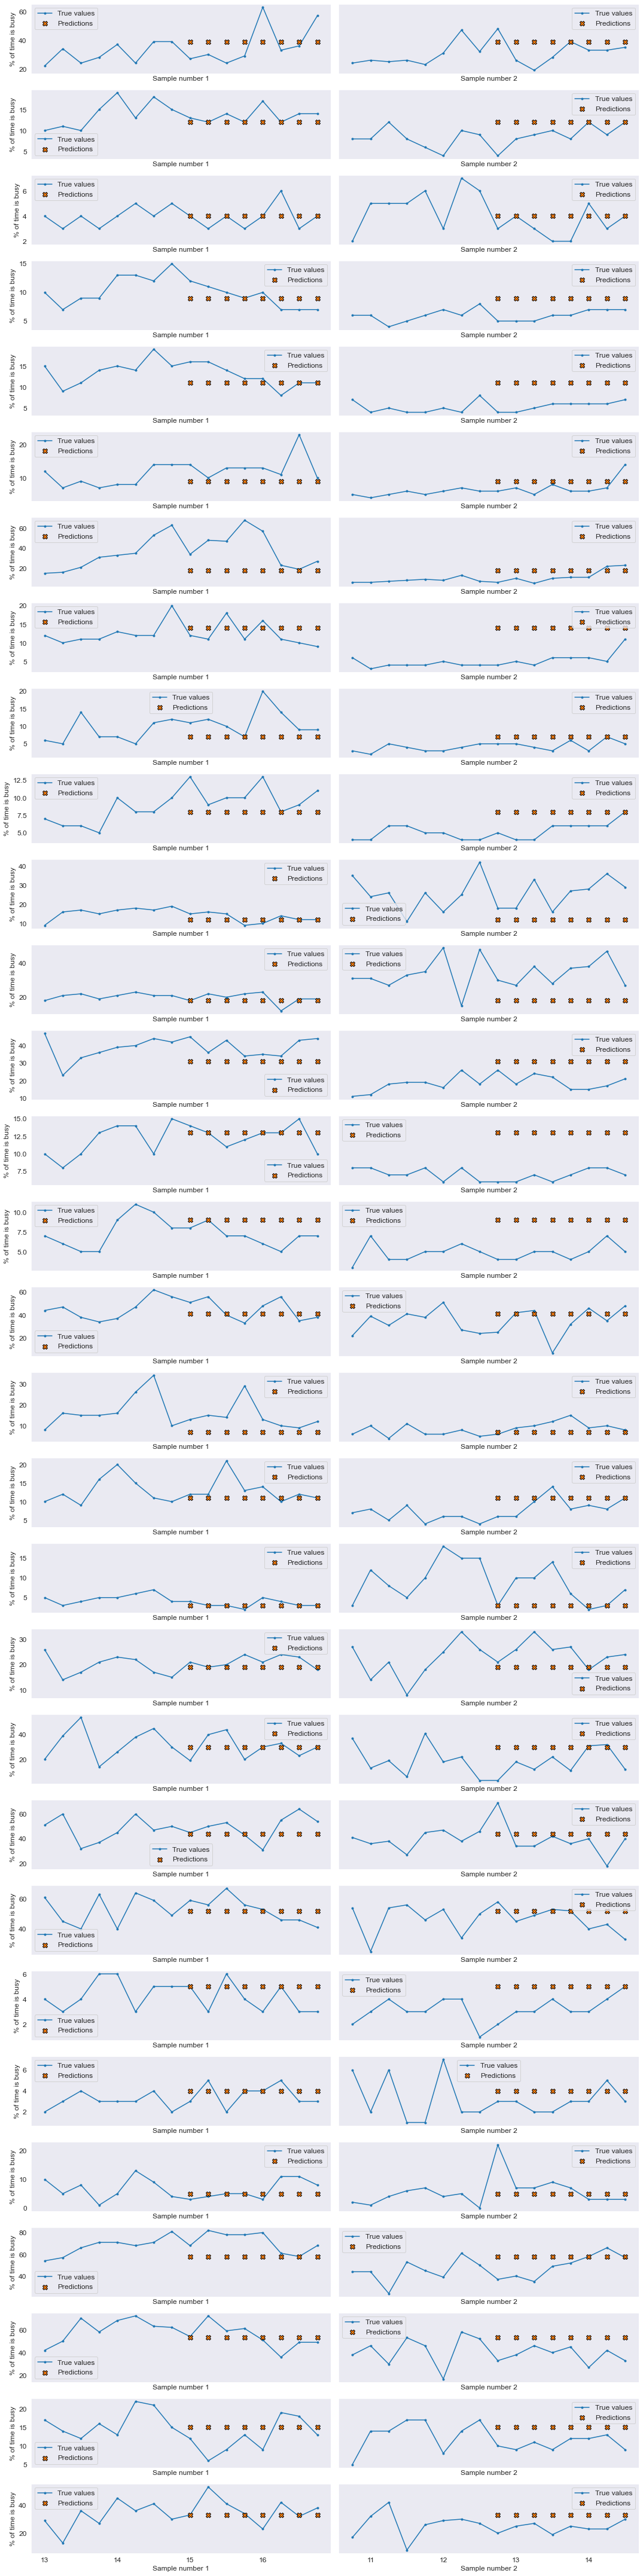

In [8]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/median.png")

# 3. Repeat regressor

In [9]:
estimators, train_losses, test_losses = timeseries_cv(RepeatRegressor(), train_x, train_y)
print_losses(train_losses, test_losses)

Train MAE: 7.66, std: 0.06
Train MSE: 146.09, std: 2.16
Test MAE: 7.42, std: 0.23
Test MSE: 136.15, std: 8.79


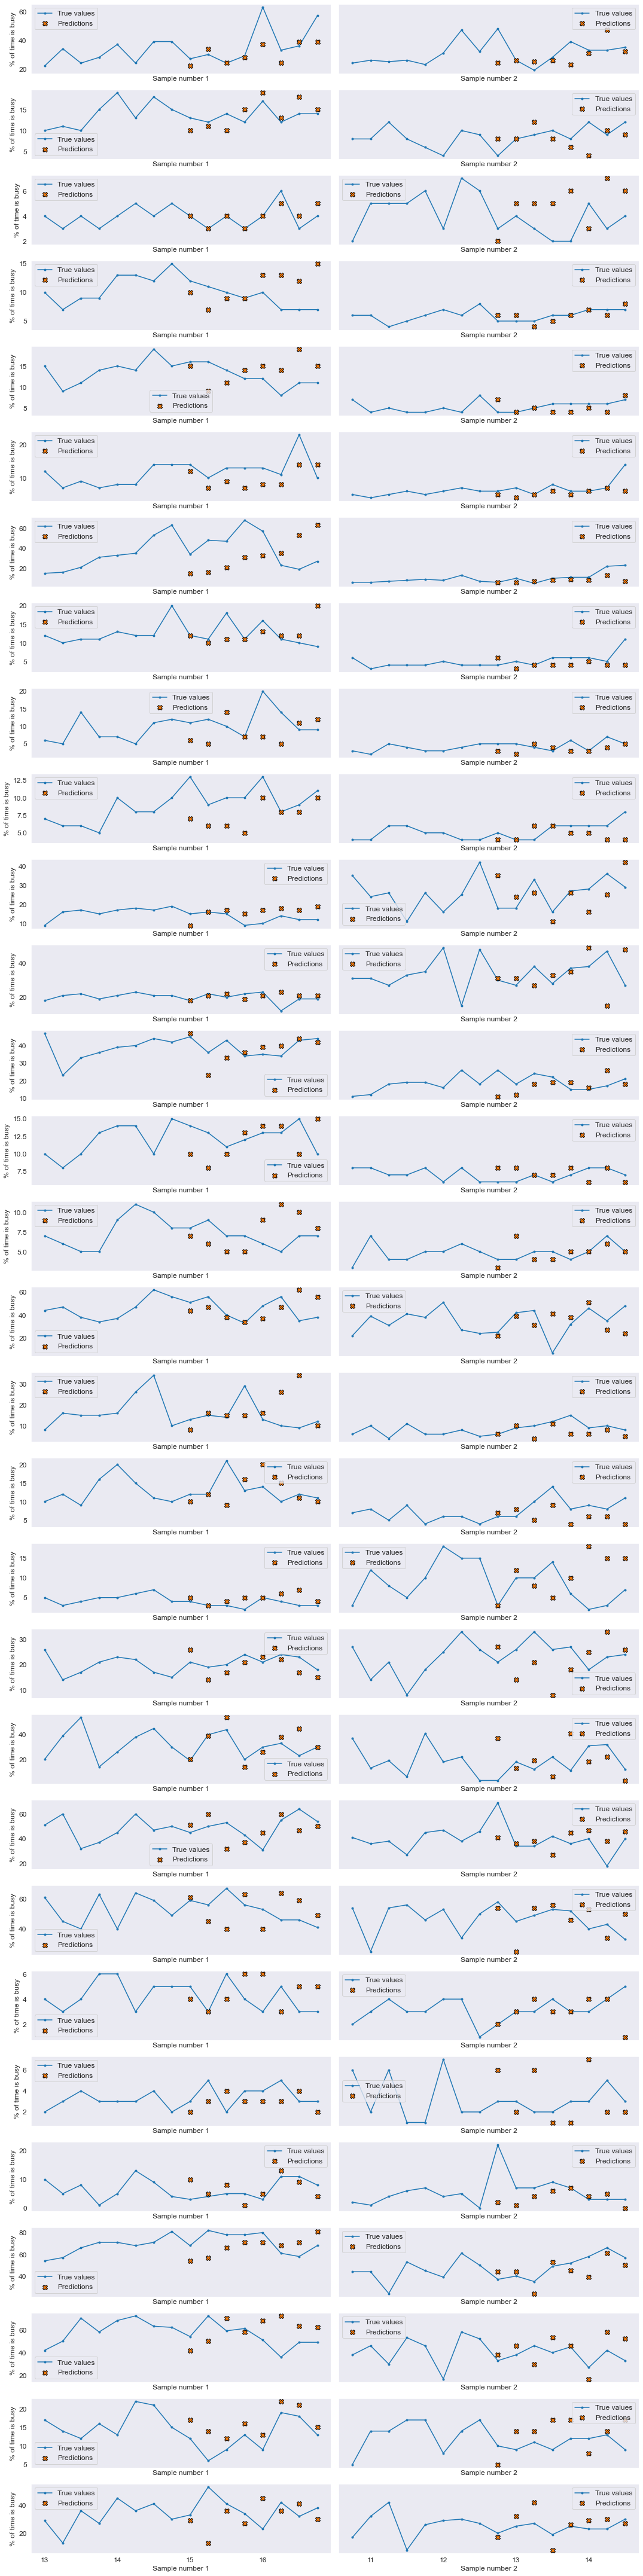

In [10]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/repeat.png")

# 4. Repeat last value regressor

In [11]:
estimators, train_losses, test_losses = timeseries_cv(RepeatLastRegressor(), train_x, train_y)
print_losses(train_losses, test_losses)

Train MAE: 6.78, std: 0.06
Train MSE: 116.09, std: 1.72
Test MAE: 6.54, std: 0.21
Test MSE: 107.57, std: 7.35


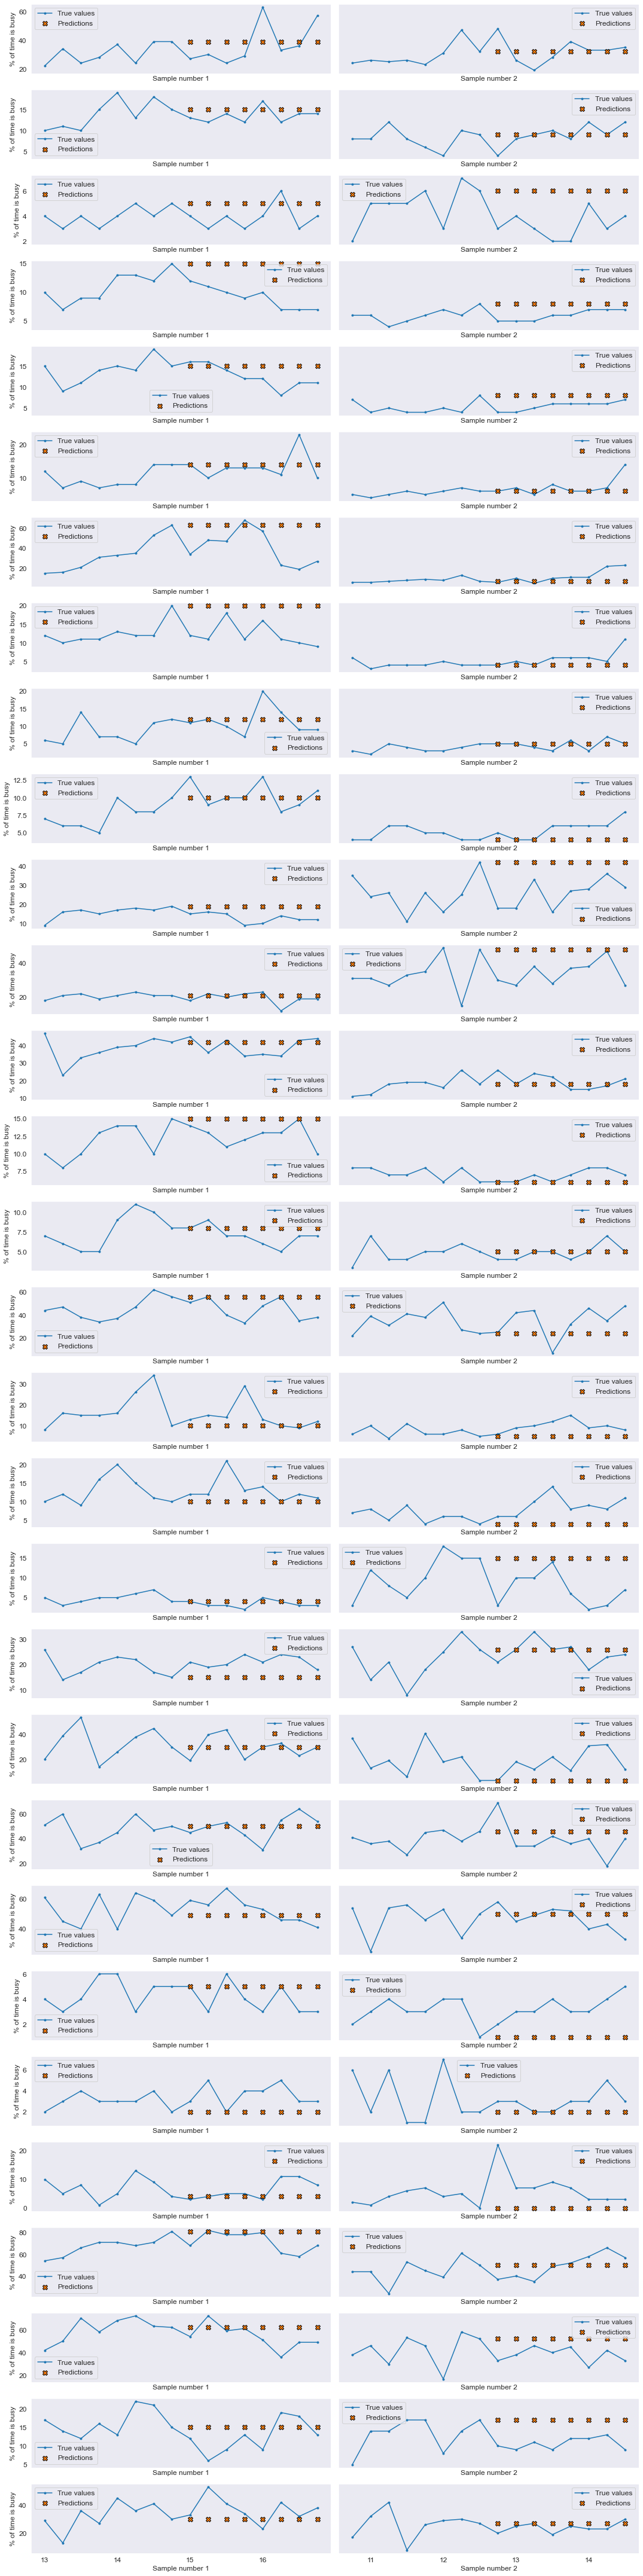

In [12]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/repeat_last.png")

# 5. Mean per hour

In [13]:
train_x.shape

(13185, 8, 30, 3)

In [14]:
estimators, train_losses, test_losses = timeseries_cv(DaytimeRegressor("mean"), train_x[:, :, :, [0, 1]], train_y)
print_losses(train_losses, test_losses)

Train MAE: 14.73, std: 0.35
Train MSE: 336.22, std: 15.37
Test MAE: 14.50, std: 0.33
Test MSE: 315.37, std: 17.63


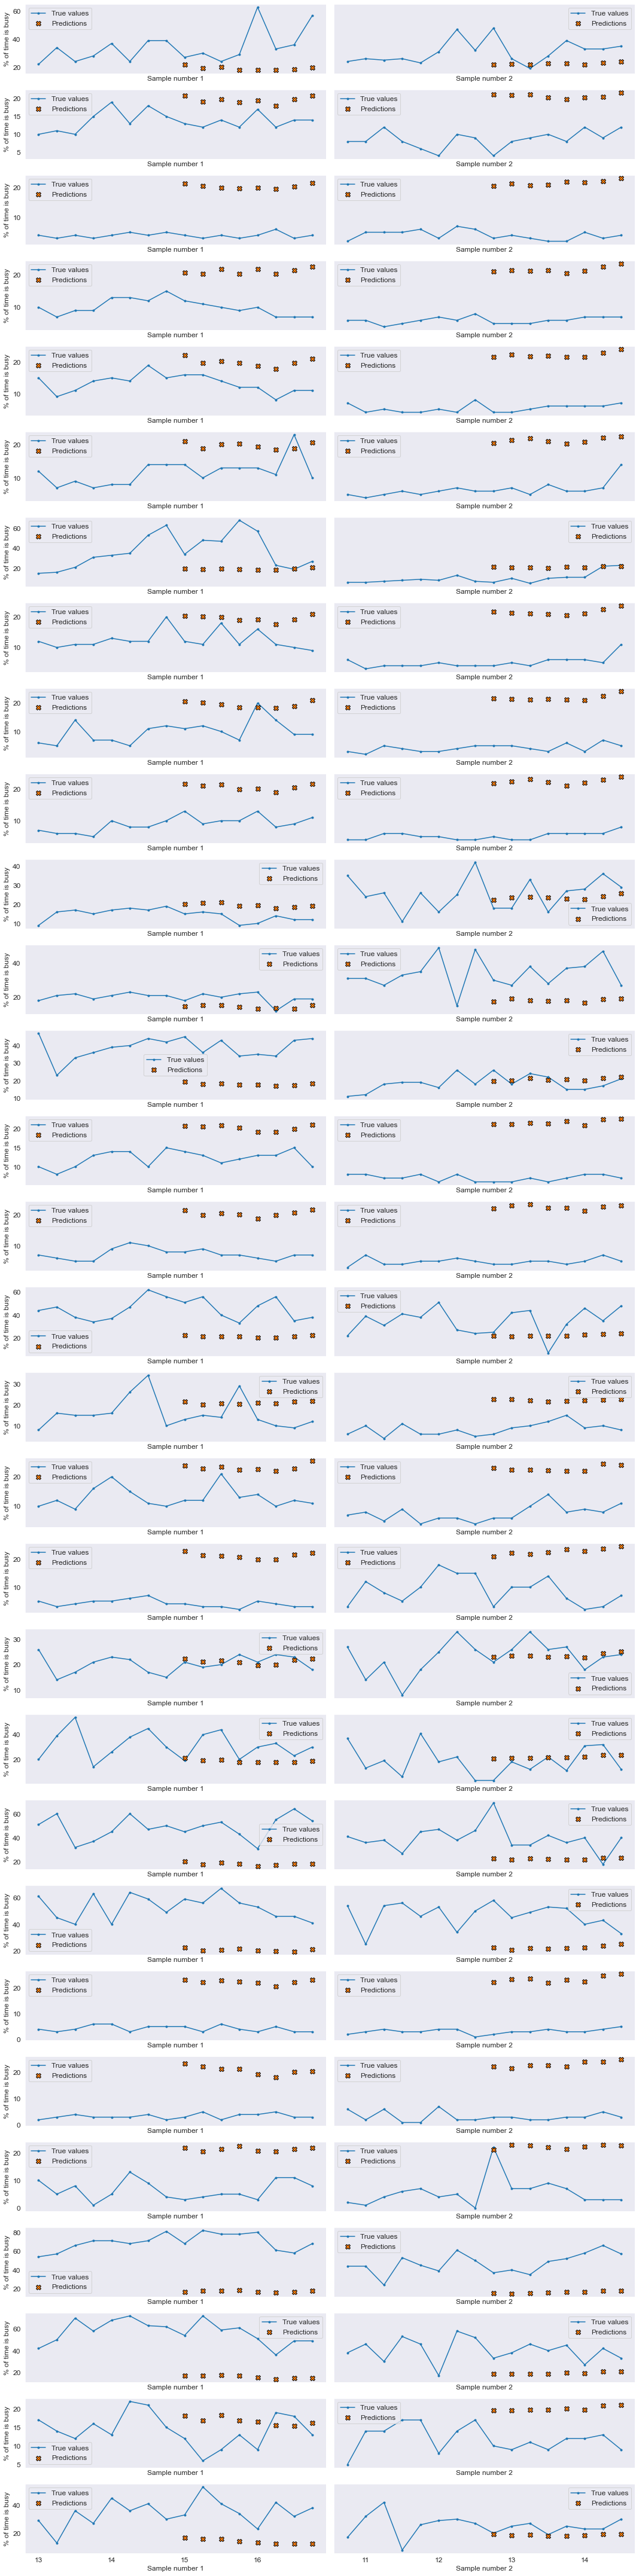

In [15]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/mean_hour.png")

In [16]:
estimators, train_losses, test_losses = timeseries_cv(DaytimeRegressor("mean", by_working_day=True), train_x[:, :, :, [0, 1, 2]], train_y)
print_losses(train_losses, test_losses)

Train MAE: 14.79, std: 0.34
Train MSE: 335.56, std: 14.67
Test MAE: 14.62, std: 0.36
Test MSE: 316.70, std: 16.77


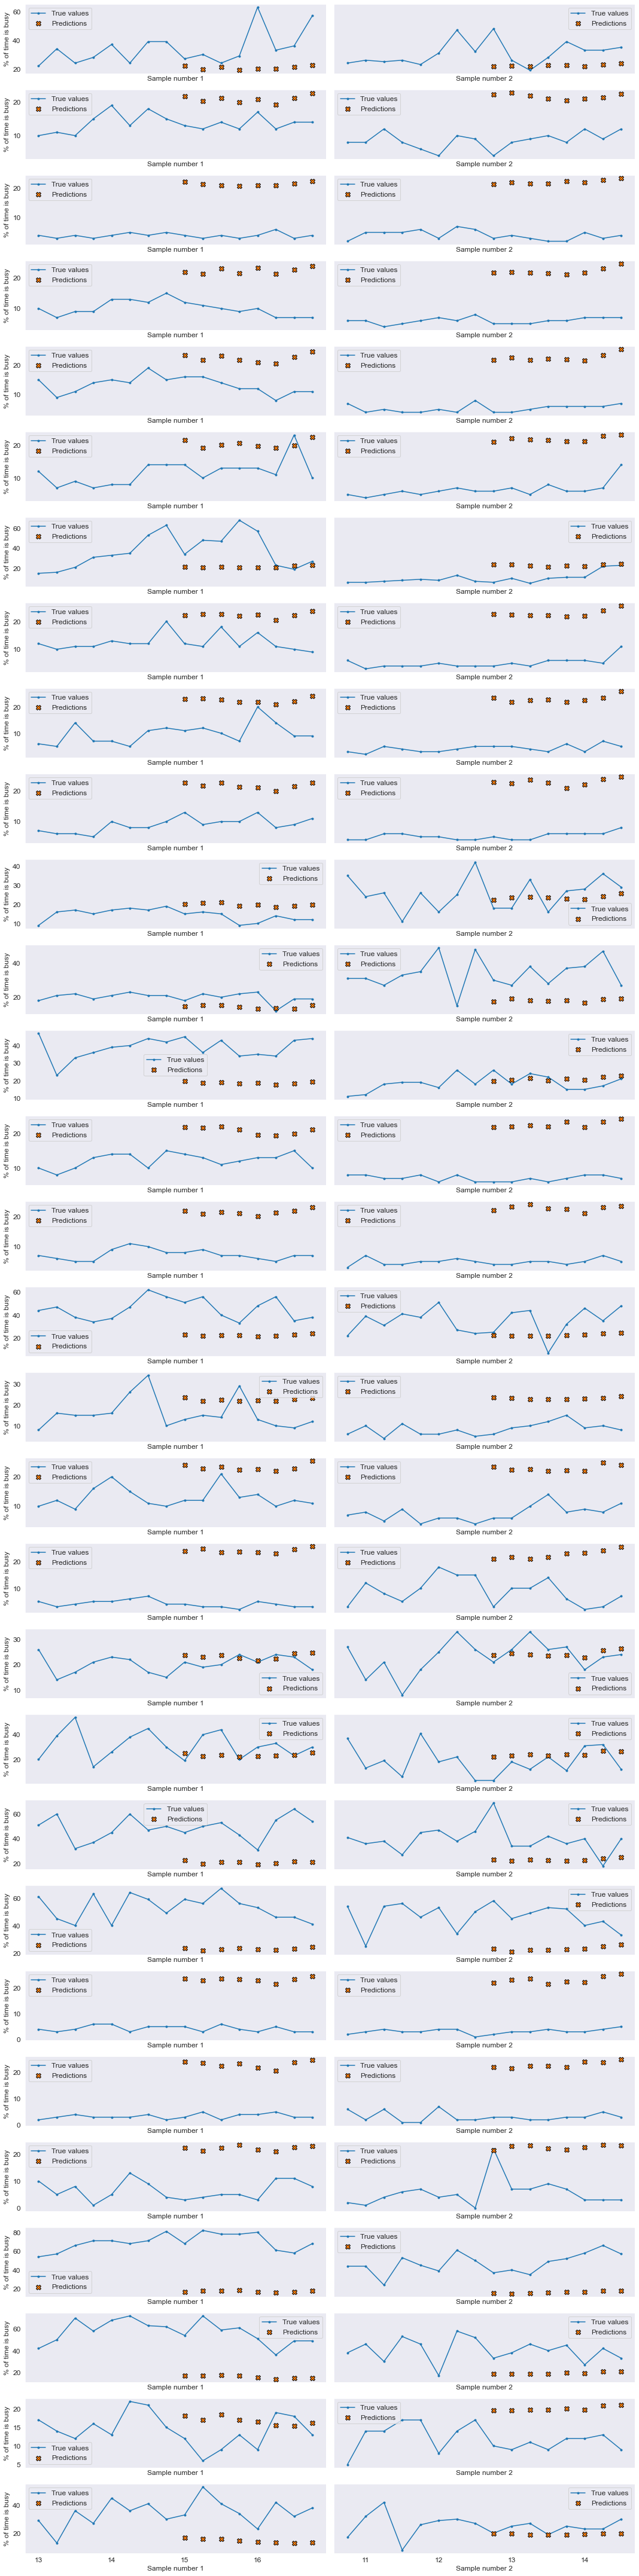

In [17]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/mean_hour_workingday.png")

# 6. Median per hour

In [18]:
estimators, train_losses, test_losses = timeseries_cv(DaytimeRegressor("median"), train_x[:, :, :, [0, 1]], train_y)
print_losses(train_losses, test_losses)

Train MAE: 13.43, std: 0.33
Train MSE: 390.67, std: 12.62
Test MAE: 13.04, std: 0.44
Test MSE: 358.87, std: 25.93


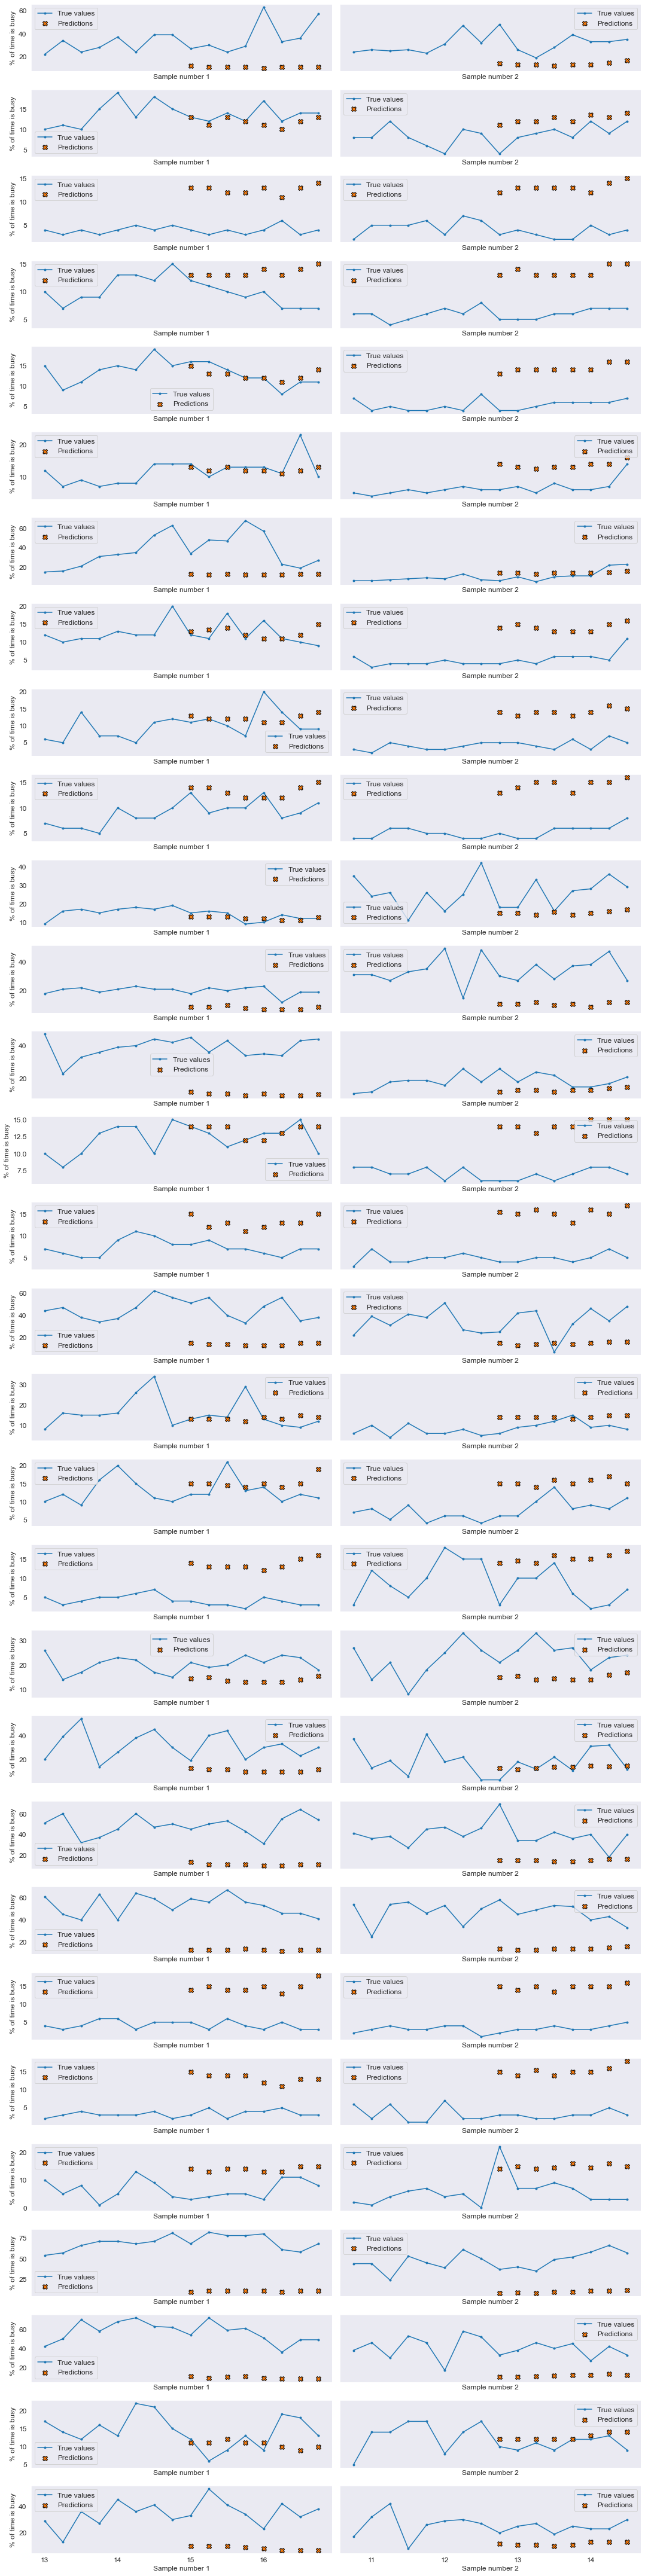

In [19]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/median_hour.png")

In [20]:
estimators, train_losses, test_losses = timeseries_cv(DaytimeRegressor("median", by_working_day=True), train_x[:, :, :, [0, 1, 2]], train_y)
print_losses(train_losses, test_losses)

Train MAE: 13.41, std: 0.29
Train MSE: 386.55, std: 11.03
Test MAE: 13.05, std: 0.41
Test MSE: 355.00, std: 21.77


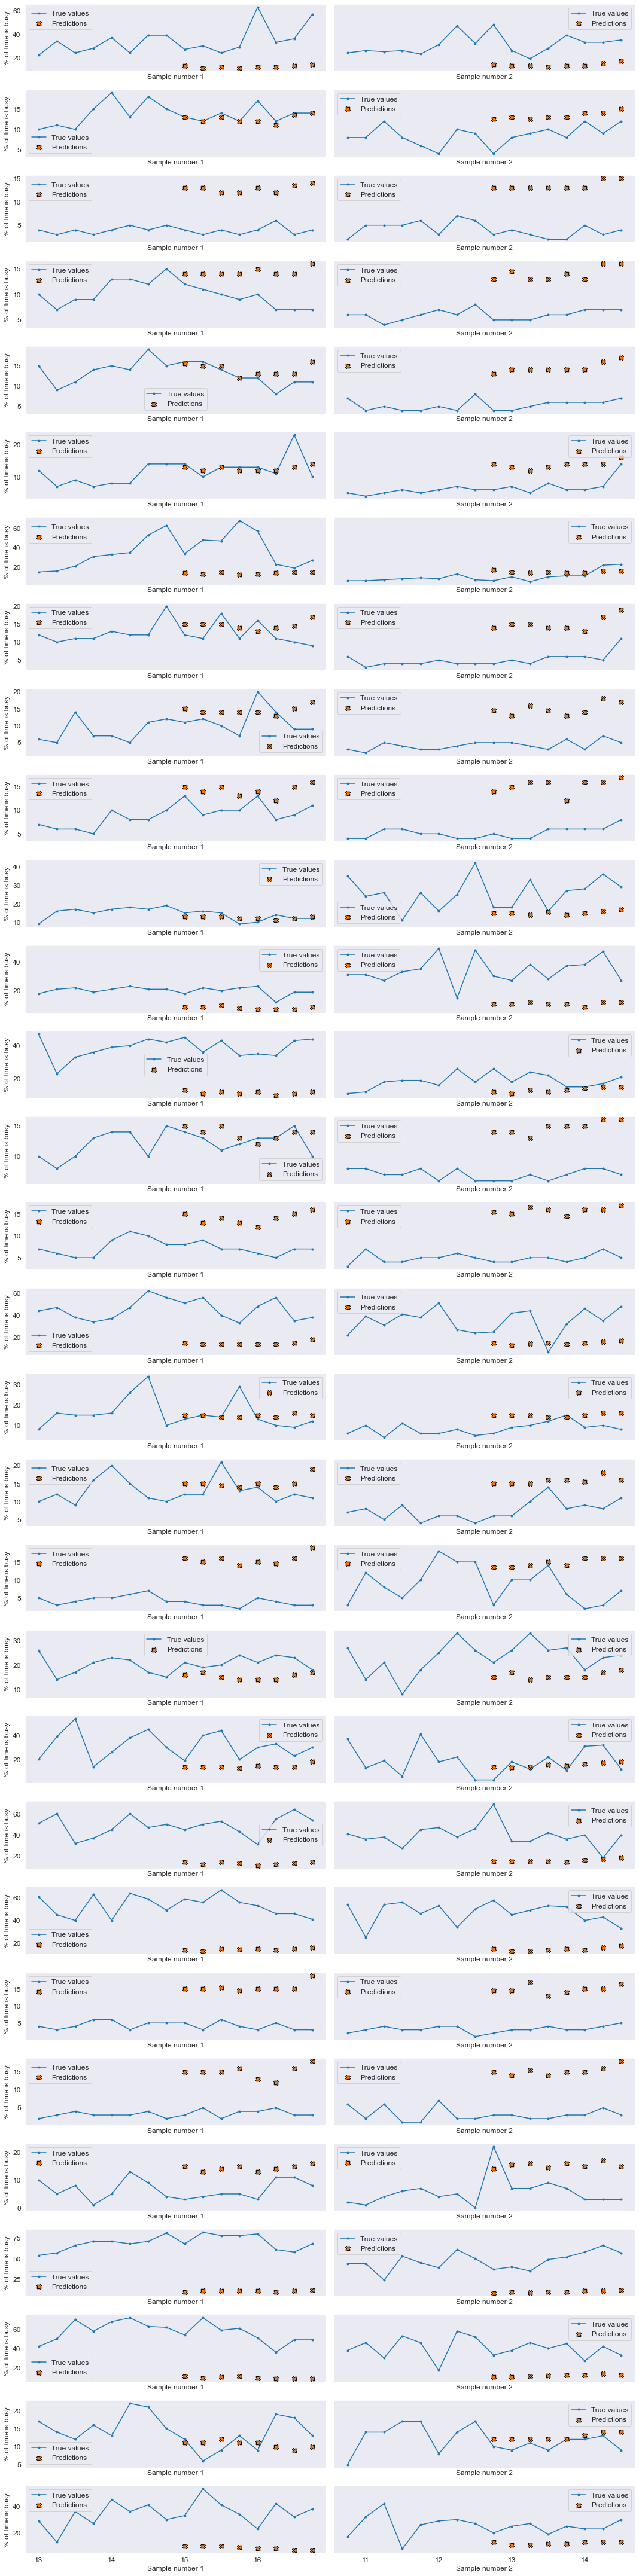

In [21]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/median_hour_workingday.png")

# 7. Drift regressor

In [22]:
estimators, train_losses, test_losses = timeseries_cv(DriftRegressor(), train_x, train_y)
print_losses(train_losses, test_losses)

Train MAE: 9.13, std: 0.08
Train MSE: 216.38, std: 3.21
Test MAE: 8.84, std: 0.28
Test MSE: 202.24, std: 13.56


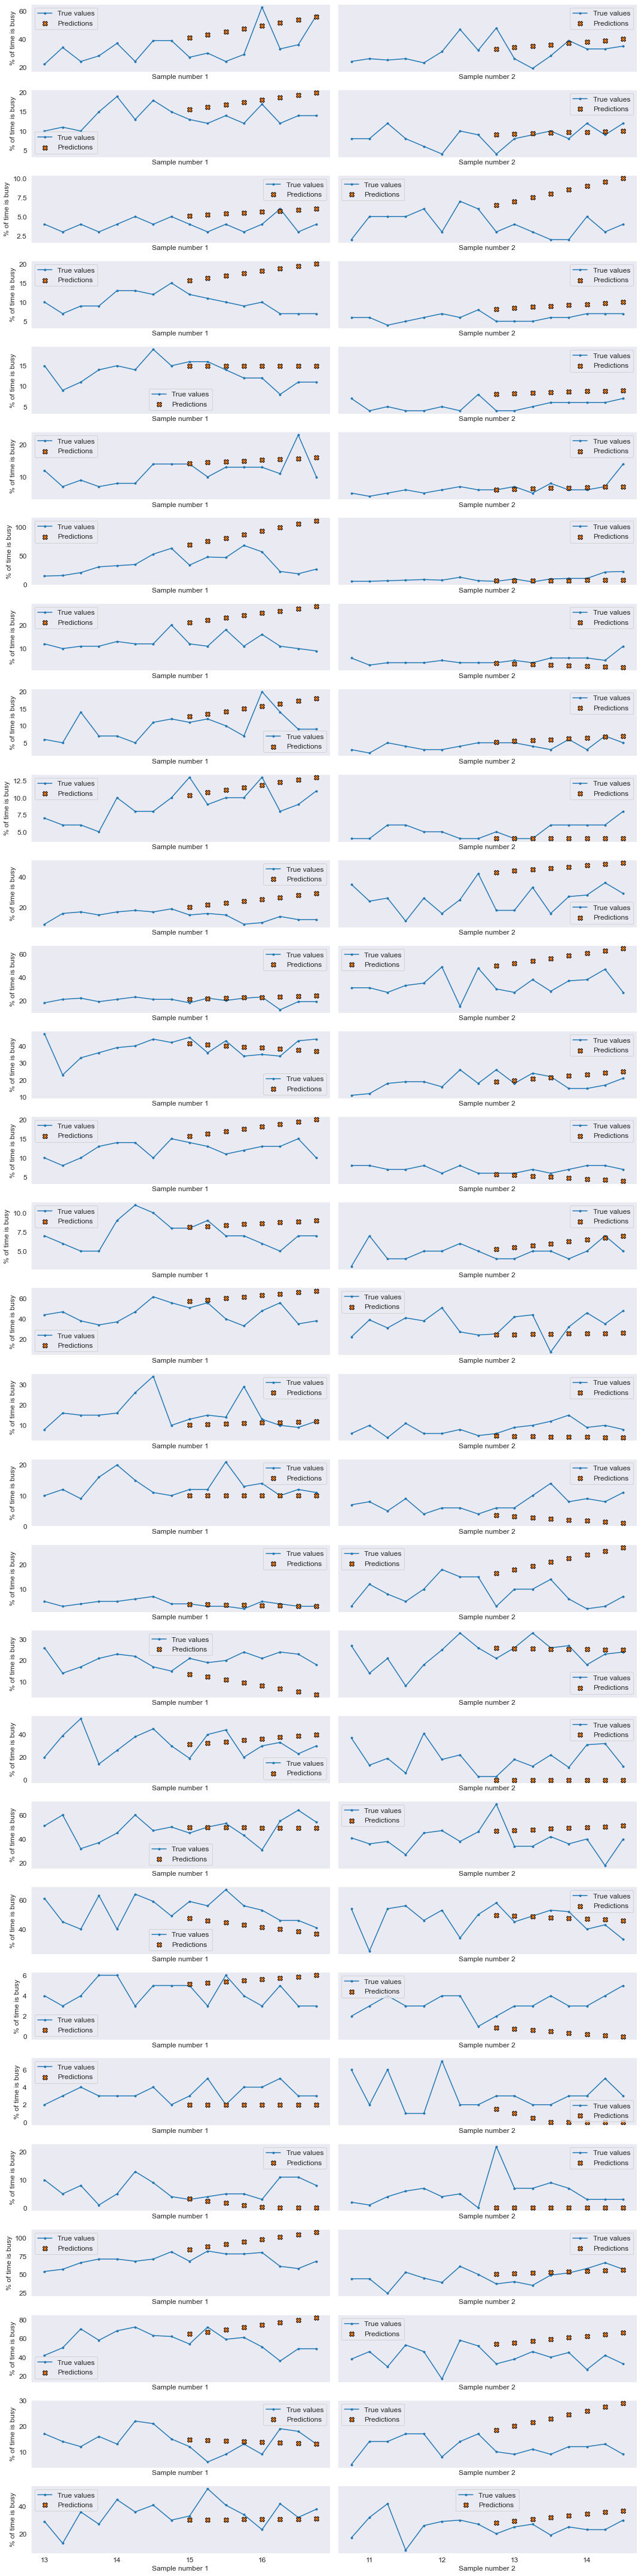

In [23]:
plot_predictions(estimators[-1], test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/drift.png")